# Machine Learning Homework 5 - Final Project

### Submission By:  
<ul>
    <li>Akshay Prakash Tambe (apt321@nyu.edu)</li>
    <li>Snahil Singh (ss11381@nyu.edu)</li>
</ul>

## Data Loading

In [561]:
# Import Packages
import pandas as pd
import numpy as np

In [562]:
def data_load():
    # Loading Comma Seperated Data using read_table pandas function in 'census_train_data' and 'census_test_data' dataframe
    census_train_data= pd.read_csv('census_train.csv')
    census_test_data = pd.read_csv('census_test.csv')

    # Adding Headers to Data
    census_train_data.columns = ["idnum", "age", "workerclass", "interestincome", "traveltimetowork",\
                                 "vehicleoccupancy", "meansoftransport", "marital", "schoolenrollment",\
                                 "educationalattain", "sex", "workarrivaltime", "hoursworkperweek", "ancestry",\
                                 "degreefield", "industryworkedin", "wages"]

    census_test_data.columns = ["idnum", "age", "workerclass", "interestincome", "traveltimetowork",\
                                 "vehicleoccupancy", "meansoftransport", "marital", "schoolenrollment",\
                                 "educationalattain", "sex", "workarrivaltime", "hoursworkperweek", "ancestry",\
                                 "degreefield", "industryworkedin"]

    # Add Wages column to test dataset for consistency
    census_test_data['wages'] = 0
    frames = [census_train_data, census_test_data]
    df = pd.concat(frames)
    df.shape
    return census_train_data, census_test_data, df

## Data Cleaning

In [563]:
def industryworked(data):
    data['industryworkedin'] = data['industryworkedin'].astype(int)
    data.loc[data.industryworkedin < 300, 'industryworkedin'] = 1
    data.loc[data.industryworkedin < 500, 'industryworkedin'] = 2
    data.loc[data.industryworkedin < 700, 'industryworkedin'] = 3
    data.loc[data.industryworkedin < 800, 'industryworkedin'] = 4
    data.loc[data.industryworkedin < 4000, 'industryworkedin'] = 5
    data.loc[data.industryworkedin < 4600, 'industryworkedin'] = 6
    data.loc[data.industryworkedin < 6000, 'industryworkedin'] = 7
    data.loc[data.industryworkedin < 6400, 'industryworkedin'] = 8
    data.loc[data.industryworkedin < 6800, 'industryworkedin'] = 9
    data.loc[data.industryworkedin < 7200, 'industryworkedin'] = 10
    data.loc[data.industryworkedin < 7800, 'industryworkedin'] = 1
    data.loc[data.industryworkedin < 7900, 'industryworkedin'] = 12
    data.loc[data.industryworkedin < 8300, 'industryworkedin'] = 13
    data.loc[data.industryworkedin < 8500, 'industryworkedin'] = 14
    data.loc[data.industryworkedin < 8700, 'industryworkedin'] = 15
    data.loc[data.industryworkedin < 9300, 'industryworkedin'] = 16
    data.loc[data.industryworkedin < 9600, 'industryworkedin'] = 17
    data.loc[data.industryworkedin < 9900, 'industryworkedin'] = 18
    data.loc[data.industryworkedin > 9900, 'industryworkedin'] = 19
    data['industryworkedin'] = data['industryworkedin'].astype(int)
    
    return data

In [564]:
def workarrivaltimebins(data):
    count=1
    final=0
    for x in range(len(data.workarrivaltime)):
        if(x%20 == 0):
            data['workarrivaltime'][x-20:x+1] = final
    #         c=c+1
    #         f=f+1
            final += 1
    data['workarrivaltime'].unique()
    return data

In [565]:
def cleaning(data):
    #########################################################
    #worker class
    #data.loc[(data.age <= 16) & (data.workerclass =='?') , 'workerclass'] = '10' #people age less than 16
    #data.loc[(data.industryworkedin =='?') & (data.workerclass =='?'),'workerclass'] = '11' #people who never worked and not in labour force and last worked more than 5 years ago
    #data.loc[(data.workarrivaltime == '?') & (data.meansoftransport == '11'),'workarrivaltime'] = '0'
    #data.loc[(data.workarrivaltime == '?'),'workarrivaltime'] = '-1'
    #data.loc[(data.industryworkedin == '?') & (data.age <= 16),'industryworkedin'] = '0'
    #data.loc[(data.industryworkedin == '?') & (data.age <= 16),'industryworkedin'] = '9920'
    #########################################################

    # Cleaning workerclass -  Filling it with zero's (New Category) as the description represents a different class from others
    data['workerclass'] = data['workerclass'].replace('?', 0)
    
    # Cleaning traveltimetowork - Filling it with zero's (New Category) as worker who works from home will never travel, 
    # Same applies to a worker who never worked.
    data['traveltimetowork'] = data['traveltimetowork'].replace('?', 0)

    # ******Cleaning vehicleoccupancy - Filling it with zero's (New Category) for now*******
    data['vehicleoccupancy'] = data['vehicleoccupancy'].replace('?', 0)

    # Cleaning meansoftransport - Filling it with zero's (New Category) as non-worked is assumed that he/she will not travel to work
    data['meansoftransport'] = data['meansoftransport'].replace('?', 0)

    # Cleaning schoolenrollment - Filling it with zero's (New Category) as the least age for enrollment is atleast 5 Years
    # 0 - No, less than 3 years
    data['schoolenrollment'] = data['schoolenrollment'].replace('?', 0)

    # Cleaning educationalattain - Filling it with zero's (New Category) as the least age for enrollment is atleast 5 Years
    # 1 - No Education Attainment, less than 3 years
    data['educationalattain'] = data['educationalattain'].replace('?', 1)

    # Cleaning meansoftransport - Filling it with zero's (New Category) as non-worked is assumed that he/she will not travel to work
    data['workarrivaltime'] = data['workarrivaltime'].replace('?', 0)

    # Cleaning hoursworkperweek - Filling it with zero's (New Category) for non-worker
    data['hoursworkperweek'] = data['hoursworkperweek'].replace('?', 0)

    # Cleaning degreefield - Filling it with 1111 (New Category) for unknown degree
    # 1000, less than bachelor's degree (Related to educationattain)
    data['degreefield'] = data['degreefield'].replace('?', 1000)

    # Cleaning industryworkedin - Filling it with 1111 (New Category) for unknown degree
    # 100, less than 16 years old/not in labor force who last worked more than 5 years ago or never worked
    data['industryworkedin'] = data['industryworkedin'].replace('?', 100)
    
    # Convert the categories feature to type 'category'
    data['workerclass'] = data['workerclass'].astype('category')
    data['vehicleoccupancy'] = data['vehicleoccupancy'].astype('category')
    data['meansoftransport'] = data['meansoftransport'].astype('category')
    data['marital'] = data['marital'].astype('category')
    data['schoolenrollment'] = data['schoolenrollment'].astype('category')
    data['educationalattain'] = data['schoolenrollment'].astype('category')
    data['sex'] = data['sex'].astype('O')
    data['workarrivaltime'] = data['workarrivaltime'].astype('category')
    data['ancestry'] = data['ancestry'].astype('category')
    data['degreefield'] = data['degreefield'].astype('category')
    data['industryworkedin'] = data['industryworkedin'].astype('category')
    
    # Convert numerical features to type 'int64'
    data['idnum'] = data['idnum'].astype(int)
    data['age'] = data['age'].astype(int)
    data['interestincome'] = data['interestincome'].astype(int)
    data['traveltimetowork'] = data['traveltimetowork'].astype(int)
    data['hoursworkperweek'] = data['hoursworkperweek'].astype(int)
    data['wages'] = data['wages'].astype(int)
        
    return data

In [566]:
def data_drop(data, columns):
    if columns is not None:
        data = data.drop(columns ,axis=1)
    return data

In [567]:
census_train_data, census_test_data, df = data_load()
# Perform Data Cleaning
clean_data = cleaning(df)

# Drop Columns
columns = ['idnum']
clean_data = data_drop(clean_data, columns)
df = clean_data
df.head(5)

,age,workerclass,interestincome,traveltimetowork,vehicleoccupancy,meansoftransport,marital,schoolenrollment,educationalattain,sex,workarrivaltime,hoursworkperweek,ancestry,degreefield,industryworkedin,wages
0,34,3,0,10,1,1,5,1,1,1,168,40,51,1000,7860,34500
1,57,2,0,15,8,1,5,1,1,1,100,30,51,1000,8390,4700
2,17,0,0,0,0,0,5,2,2,2,0,0,714,1000,100,0
3,42,1,0,20,1,1,1,1,1,1,92,45,21,5001,6990,120000
4,18,0,0,0,0,0,5,2,2,2,0,0,999,1000,100,0


In [568]:
# From our combined we get back our train & test datasets
train = df[:1183]
test = df[1183:]

#---------------------
# Drop Age less than 16
#train = train.loc[train.age >= 16,:]
#---------------------
print(train.shape)
print(test.shape)

# Combine train and test so we can continue performing other operations on the whole dataset
frames = [train, test]
df = pd.concat(frames)
print(df.shape)

# Make sure there is no null value in the target feature
np.where(np.isnan(df['wages']))

(1183, 16)
(499, 16)
(1682, 16)


(array([], dtype=int64),)

## Data Transformation - Scaling and One-Hot Encoding

## Scaling

In [569]:
from sklearn.preprocessing import StandardScaler

def perform_scaling(df):
    # Get all numeric features
    numerical_features = []
    for feature in df.dtypes.index:
        # Exclude the target variable 'wages' and 'idnum' column    
        if (df[feature].dtype != np.object) and (str(df[feature].dtype) != 'category') \
                and (feature != 'wages') and (feature != 'idnum'):
            numerical_features.append(feature)

    print(numerical_features)
    
    # Perform Standard Scaling for numerical features only
    scaler = StandardScaler()

    # Again, from our combined df we get back our train & test datasets
    train = df[:1183]
    test = df[1183:]

    train.loc[:,numerical_features] = scaler.fit_transform(train[numerical_features])
    test.loc[:,numerical_features] = scaler.transform(test[numerical_features])

    # Combine train and test so we can continue performing other operations on the whole dataset
    frames = [train, test]
    df = pd.concat(frames)

    return df

In [570]:
df = perform_scaling(df)
df.head(5)

['age', 'interestincome', 'traveltimetowork', 'hoursworkperweek']


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,age,workerclass,interestincome,traveltimetowork,vehicleoccupancy,meansoftransport,marital,schoolenrollment,educationalattain,sex,workarrivaltime,hoursworkperweek,ancestry,degreefield,industryworkedin,wages
0,-0.701676,3,-0.123582,-0.275096,1,1,5,1,1,1,168,0.795301,51,1000,7860,34500
1,0.444641,2,-0.123582,-0.072684,8,1,5,1,1,1,100,0.321874,51,1000,8390,4700
2,-1.548954,0,-0.123582,-0.679921,0,0,5,2,2,2,0,-1.098406,714,1000,100,0
3,-0.302957,1,-0.123582,0.129729,1,1,1,1,1,1,92,1.032014,21,5001,6990,120000
4,-1.499114,0,-0.123582,-0.679921,0,0,5,2,2,2,0,-1.098406,999,1000,100,0


In [571]:
# Make sure there is no null value in the target feature
np.where(np.isnan(df['wages']))

(array([], dtype=int64),)

## One-Hot Encoding

In [572]:
def perform_one_hot_encoding(df):
    # Get all categorical features
    categorical_features = []
    for feature in df.dtypes.index:
        if (str(df[feature].dtype) == 'category'):
            categorical_features.append(feature)

    print(categorical_features)
    
    # Perform One-Hot Encoding
    df_dummies = pd.get_dummies(df[categorical_features])
    df = df.drop(df[categorical_features],axis=1)
    df = pd.concat([df, df_dummies],axis=1)
    return df

In [573]:
df = perform_one_hot_encoding(df)
df.head(5)

['workerclass', 'vehicleoccupancy', 'meansoftransport', 'marital', 'schoolenrollment', 'educationalattain', 'workarrivaltime', 'ancestry', 'degreefield', 'industryworkedin']


,age,interestincome,traveltimetowork,sex,hoursworkperweek,wages,workerclass_0,workerclass_1,workerclass_2,workerclass_3,...,industryworkedin_9470,industryworkedin_9480,industryworkedin_9490,industryworkedin_9570,industryworkedin_9590,industryworkedin_9670,industryworkedin_9680,industryworkedin_9770,industryworkedin_9870,industryworkedin_9920
0,-0.701676,-0.123582,-0.275096,1,0.795301,34500,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.444641,-0.123582,-0.072684,1,0.321874,4700,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.548954,-0.123582,-0.679921,2,-1.098406,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.302957,-0.123582,0.129729,1,1.032014,120000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.499114,-0.123582,-0.679921,2,-1.098406,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [574]:
# For the last time, from our combined df we get back our train & test datasets.
train = df[:1183]#1183
test = df[1183:]

test = test.drop(['wages'],axis=1)

print(train.shape)
print(test.shape)

(1183, 613)
(499, 612)


## Modeling

In [575]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(actual, predictions):
    predictions = np.round(predictions/100)*100
    mse = mean_squared_error(actual, predictions)
    return sqrt(mse)

In [576]:
def plot_info(res, title):
    
    feat = res.keys()
    imp = res.values()
    # Plotting Feature_Names on X-Axis and Feature_importances on Y-Axis
    plt.figure(figsize=(12, 8))
    plt.bar(range(len(feat)), imp)
    plt.xticks(range(len(feat)), feat, rotation=40)
    plt.xlabel('Feature Name')
    plt.ylabel('Feature Importance')
    plt.title(title)
    plt.show()

In [577]:
# Seperating features and labels
X = train.drop(['wages'],axis=1)
y = train['wages']

from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt

dis_mutual_info = mutual_info_regression(X, y, copy = True)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


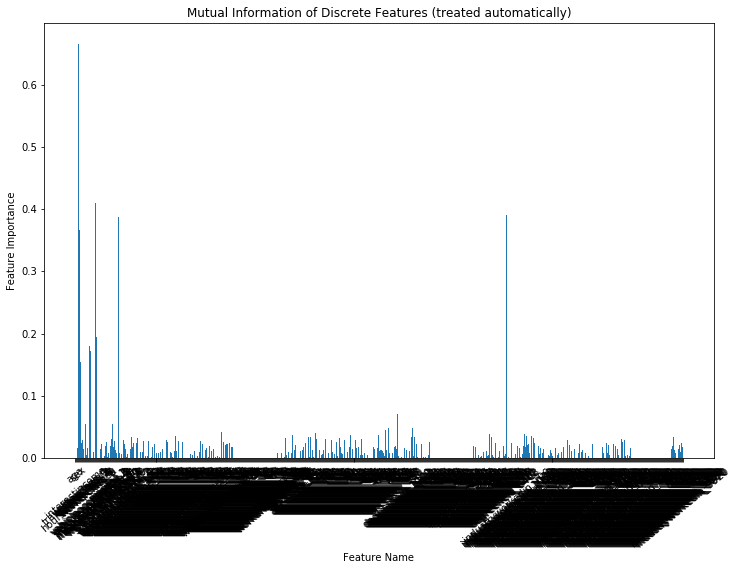

In [578]:
dis_res = dict(zip(X.columns.values, dis_mutual_info))
plot_info(dis_res, "Mutual Information of Discrete Features (treated automatically)")

In [579]:
from sklearn.feature_selection import SelectKBest

kbest = SelectKBest(mutual_info_regression, k=34)
kbest.fit(X, y)
top_features = kbest.get_support(indices=True)
top_features

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


array([  0,   2,   4,   5,   6,  11,  14,  15,  16,  21,  22,  27,  33,
        37,  44,  87,  92, 113, 140, 161, 172, 210, 275, 324, 390, 421,
       434, 438, 439, 448, 511, 562, 563, 571])

In [580]:
X = X.iloc[:,top_features]
X

,age,traveltimetowork,hoursworkperweek,workerclass_0,workerclass_1,workerclass_6,workerclass_9,vehicleoccupancy_0,vehicleoccupancy_1,meansoftransport_0,...,degreefield_5098,degreefield_6199,industryworkedin_100,industryworkedin_1190,industryworkedin_1270,industryworkedin_2190,industryworkedin_5591,industryworkedin_7860,industryworkedin_7870,industryworkedin_8170
0,-0.701676,-0.275096,0.795301,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.444641,-0.072684,0.321874,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.548954,-0.679921,-1.098406,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
3,-0.302957,0.129729,1.032014,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.499114,-0.679921,-1.098406,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
5,0.943039,-0.679921,-0.956378,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
6,-1.349594,-0.679921,-1.098406,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7,-1.499114,-0.477508,-0.624979,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,-0.253117,1.344203,0.037818,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1.740477,-0.679921,-1.098406,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0


In [581]:
from sklearn.model_selection import train_test_split

# Train-Test Split 1,14,28,34,41,42
x_train, x_test, y_train, y_test = np.array(train_test_split(X, y, train_size = 0.7, random_state=29))

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [582]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, make_scorer
from sklearn.model_selection import cross_val_score

# Initialize different regression algorithms
linear_reg = LinearRegression()
ridge = Ridge()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
KNN = KNeighborsRegressor()

models = [linear_reg, ridge, decision_tree, random_forest,KNN]
model_name = ['linear_reg', 'ridge', 'decision_tree','random_forest','KNN']
scorer = make_scorer(r2_score)
result = {}

for name, model in enumerate(models):
    # Fit the Model
    model.fit(x_train, y_train)

    # Get the Scores
    train_score = model.score(x_train, y_train)
    cv_score = cross_val_score(model, x_train, y_train,cv=3, scoring = scorer)
    preds = model.predict(x_test)
    rmse_score = rmse(y_test, preds)

    # Add Results
    name = model_name[name]
    result[name] = [train_score, cv_score.mean(), rmse_score]

for model_scores in result:
    print(model_scores, result[model_scores])

linear_reg [0.36312981552378154, 0.22354566679653762, 38584.29837911337]
ridge [0.36183972486815175, 0.26787075776596425, 38513.32547515119]
decision_tree [0.9999891594505861, -0.2834361341380159, 71953.27687631354]
random_forest [0.9185033750858071, 0.1773962846849819, 50358.69744313304]
KNN [0.5612908521796124, 0.29801878214984134, 40876.31005438201]


## Hyperparameter Tuning

In [583]:
## Random Forest
from sklearn.model_selection import RandomizedSearchCV
def rf_tuning():
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}

    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    random_forest = RandomForestRegressor()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
    # Fit the random search model
    rf_random.fit(x_train, y_train)
    return rf_random.best_params_

In [584]:
# "idnum", "age", "workerclass", "interestincome", "traveltimetowork",\
# "vehicleoccupancy", "meansoftransport", "marital", "schoolenrollment",\
# "educationalattain", "sex", "workarrivaltime", "hoursworkperweek", "ancestry",\
# "degreefield", "industryworkedin", "wages"

random_forest = RandomForestRegressor(bootstrap = False, max_depth = 30, max_features = 'sqrt', \
                                        min_samples_leaf = 1, min_samples_split = 5, n_estimators = 1400)

# Fit the Model
random_forest.fit(x_train, y_train)

# Get the Scores
train_score = random_forest.score(x_train, y_train)
cv_score = cross_val_score(random_forest, x_train, y_train, cv=5, scoring = scorer)
preds = random_forest.predict(x_test)
rmse_score = rmse(y_test, preds)
rmse_score

38114.232782038

In [585]:
"""
compare_df = pd.DataFrame()
compare_df['actuals'] = y_test
predicted_salary = np.exp(list(preds))-1
compare_df['predictions'] = np.round(predicted_salary/100)*100
compare_df['predictions'] = compare_df['predictions'].astype('int64')
rmse_score = rmse(compare_df['actuals'], compare_df['predictions'])
rmse_score
"""

"\ncompare_df = pd.DataFrame()\ncompare_df['actuals'] = y_test\npredicted_salary = np.exp(list(preds))-1\ncompare_df['predictions'] = np.round(predicted_salary/100)*100\ncompare_df['predictions'] = compare_df['predictions'].astype('int64')\nrmse_score = rmse(compare_df['actuals'], compare_df['predictions'])\nrmse_score\n"

In [586]:
compare_df = pd.DataFrame()
compare_df['actuals'] = y_test
#predicted_salary = np.exp(list(preds))-1
compare_df['predictions'] = np.round(preds/100)*100
compare_df['predictions'] = compare_df['predictions'].astype('int64')
compare_df

,actuals,predictions
611,7000,48000
814,28000,18400
868,0,800
685,189000,119300
185,0,0
1064,55000,112700
684,0,0
1156,50000,34100
453,0,0
395,53000,53600


In [587]:
compare_df[compare_df['actuals']==0]

,actuals,predictions
868,0,800
185,0,0
684,0,0
453,0,0
1051,0,0
578,0,25400
788,0,0
697,0,100
86,0,0
263,0,0


In [588]:
compare_df[compare_df['predictions']==0]

,actuals,predictions
185,0,0
684,0,0
453,0,0
1051,0,0
788,0,0
86,0,0
263,0,0
1094,0,0
380,0,0
1098,0,0
